In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data = pd.read_excel('数据科学实践Data/GA-KP.xlsx')
weights = data['体积'][1:].values
values = data['价值'][1:].values
capacity = 6422


In [ ]:
def fitness(individual, weights, values, capacity):
    total_weight = np.sum(individual * weights)
    total_value = np.sum(individual * values)
    if total_weight > capacity:
        return 0
    else:
        return total_value

# 初始化种群
def initialize_population(pop_size, num_items):
    return np.random.randint(2, size=(pop_size, num_items))

# 选择操作
def selection(population, fitnesses):
    idx = np.random.choice(np.arange(len(population)), size=len(population), replace=True, p=fitnesses/fitnesses.sum())
    return population[idx]

# 交叉操作
def crossover(parent1, parent2, Pcross):
    if random.random() < Pcross:
        point = random.randint(1, len(parent1)-1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

# 变异操作
def mutate(individual, Pmutate):
    for i in range(len(individual)):
        if random.random() < Pmutate:
            individual[i] = 1 - individual[i]
    return individual

# GA算法步骤
def genetic_algorithm(weights, values, capacity, pop_size, max_epoch, Pcross, Pmutate):
    num_items = len(weights)
    population = initialize_population(pop_size, num_items)
    best_fitness_history = []
    best_individual = None
    best_fitness = 0

    for epoch in range(max_epoch):
        fitnesses = np.array([fitness(ind, weights, values, capacity) for ind in population])
        best_idx = np.argmax(fitnesses)
        if fitnesses[best_idx] > best_fitness:
            best_fitness = fitnesses[best_idx]
            best_individual = population[best_idx]
        best_fitness_history.append(best_fitness)

        selected_population = selection(population, fitnesses)
        next_population = []

        for i in range(0, pop_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            child1, child2 = crossover(parent1, parent2, Pcross)
            next_population.append(mutate(child1, Pmutate))
            next_population.append(mutate(child2, Pmutate))

        population = np.array(next_population)

    return best_fitness_history, best_individual


# p12-1 

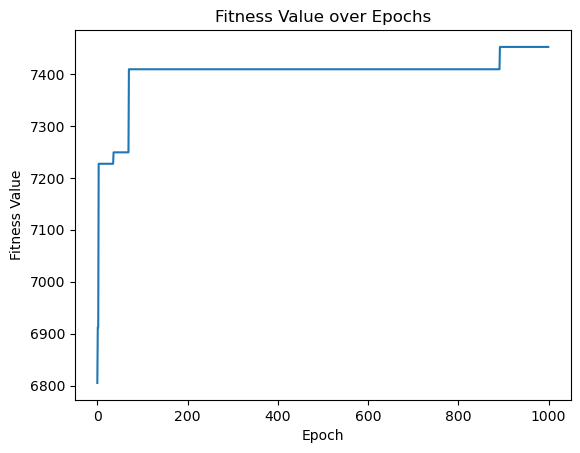

最大值 f^opt: 7452
最优解 x^opt: [1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1]


In [3]:
# P12-1 运行算法并绘制目标函数值随epoch变化的曲线图
pop_size = 100
max_epoch = 1000
Pcross = 0.8
Pmutate = 0.1

best_fitness_history, best_individual = genetic_algorithm(weights, values, capacity, pop_size, max_epoch, Pcross, Pmutate)

plt.plot(best_fitness_history)
plt.xlabel('Epoch')
plt.ylabel('Fitness Value')
plt.title('Fitness Value over Epochs')
plt.show()

print(f"最大值 f^opt: {best_fitness_history[-1]}")
print(f"最优解 x^opt: {best_individual}")


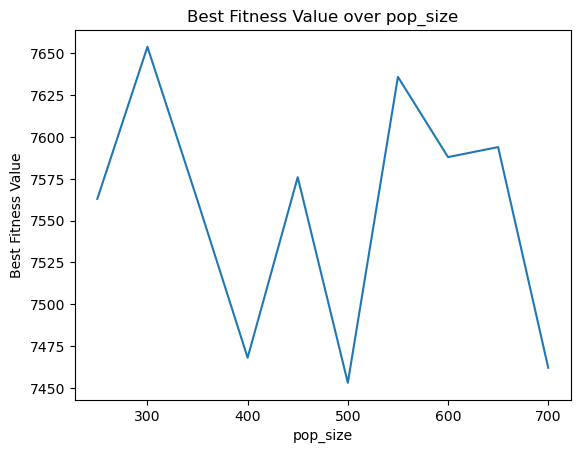

pop_size: 300


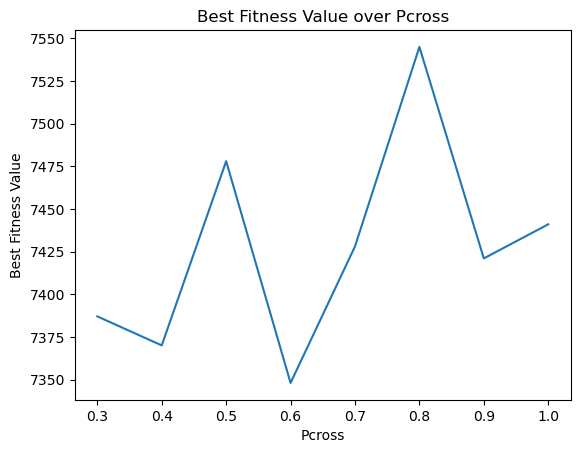

Pcross: 0.8


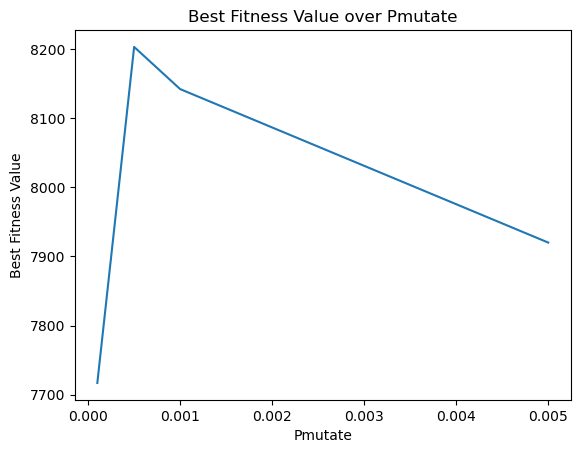

Pmutate: 0.0005


In [4]:
# P12-2 优化超参数值
def optimize_hyperparameter(param_name, param_values, weights, values, capacity, pop_size, max_epoch, Pcross, Pmutate):
    best_fitness_values = []
    for value in param_values:
        if param_name == 'pop_size':
            best_fitness_history, _ = genetic_algorithm(weights, values, capacity, value, max_epoch, Pcross, Pmutate)
        elif param_name == 'Pcross':
            best_fitness_history, _ = genetic_algorithm(weights, values, capacity, pop_size, max_epoch, value, Pmutate)
        elif param_name == 'Pmutate':
            best_fitness_history, _ = genetic_algorithm(weights, values, capacity, pop_size, max_epoch, Pcross, value)
        best_fitness_values.append(best_fitness_history[-1])

    plt.plot(param_values, best_fitness_values)
    plt.xlabel(param_name)
    plt.ylabel('Best Fitness Value')
    plt.title(f'Best Fitness Value over {param_name}')
    plt.show()
    return param_values[np.argmax(best_fitness_values)]
# 优化群体规模
print('pop_size:', optimize_hyperparameter('pop_size', [250, 300, 350, 400, 450, 500, 550, 600, 650, 700], weights, values, capacity, pop_size, max_epoch, Pcross, Pmutate))
# 优化交叉概率
print('Pcross:', optimize_hyperparameter('Pcross', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], weights, values, capacity, pop_size, max_epoch, Pcross, Pmutate))

# 优化变异概率
print('Pmutate:', optimize_hyperparameter('Pmutate', [0.0001, 0.0005, 0.001, 0.005], weights, values, capacity, pop_size, max_epoch, Pcross, Pmutate))


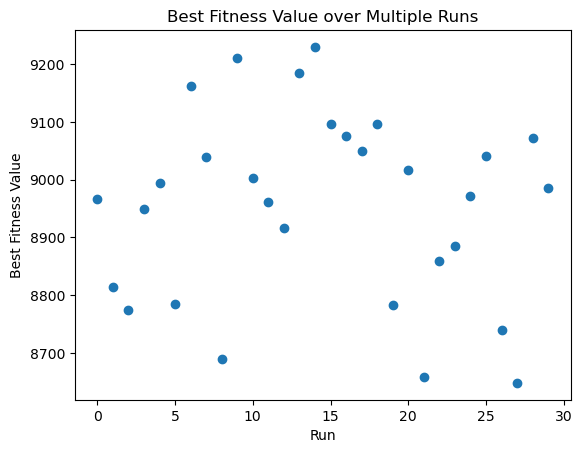

全局最大值 f^*: 9230


In [ ]:
pop_size = 300
pcross = 0.8
Pmutate = 0.0005
best_fitness_values = []
for _ in range(30):
    best_fitness_history, _ = genetic_algorithm(weights, values, capacity, pop_size, max_epoch, Pcross, Pmutate)
    best_fitness_values.append(best_fitness_history[-1])

plt.scatter(range(30), best_fitness_values)
plt.xlabel('Run')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Value over Multiple Runs')
plt.show()

print(f"全局最大值 f^*: {max(best_fitness_values)}")

In [ ]:
def knapsack(weights, values, capacity):
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                if dp[i - 1][w] < dp[i - 1][w - weights[i - 1]] + values[i - 1]:
                    dp[i][w] = dp[i - 1][w - weights[i - 1]] + values[i - 1]
                else:
                    dp[i][w] = dp[i - 1][w]
            else:
                dp[i][w] = dp[i - 1][w]
    w = capacity
    selected_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i - 1)
            w -= weights[i - 1]
    selected_items.reverse()
    return dp[n][capacity], selected_items

In [4]:
knapsack(weights, values, capacity)[0]

10138

In [5]:
knapsack(weights, values, capacity)[1]

[2,
 8,
 9,
 10,
 11,
 13,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 31,
 33,
 36,
 37,
 38,
 40,
 41,
 43,
 44,
 47,
 48,
 49,
 53,
 54,
 55,
 57,
 60,
 61,
 64,
 66,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 89,
 91,
 92,
 94,
 100,
 104,
 105,
 106,
 109,
 110,
 111,
 112,
 118,
 121,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 151,
 152,
 155,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 195,
 200,
 201,
 202,
 204,
 207,
 208,
 209,
 210,
 211,
 212,
 215,
 217,
 219,
 223,
 224,
 225,
 227,
 228,
 229,
 230,
 232,
 234,
 235,
 236,
 237,
 239,
 240,
 241,
 244,
 245,
 247,
 248]